# Airbnb

Práctica realizada por Ana Sanuy Garabatos, Ángela Corchero Corral, Begoña Cabañas Agudo, Naomi Petriarca, Sergio Moreno González y Tomás Vela Angulo.

## 1. Preprocessing básico

In [1]:
#Cargamos las librerias:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss

sns.set()
#pip install style
#style.use('ggplot') or plt.style.use('ggplot')
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"

In [2]:
#Recomendamos guargar el csv en la misma carpeta que el ipynb
data = pd.read_csv('airbnb-listings-extract.csv',sep=';')

Es importante visualizar cómo es nuestra base de datos

In [3]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Nuestra base de datos cuenta con 14780 observaciones en las que se recoge la información de 89 variables. Dentro del conjunto de variables, únicamente 36 son numéricas, por lo que habrá que estudiar qué hacer con ellas. Habrá que eliminar variables compuestas por string que sean imposibles de incluir en la construcción de nuestros modelos. 

Eliminamos variables que a simple vista se observa que serán irrelevantes para la construcción de un evaluador de precios. Muchas serán eliminadas por contener grandes descripciones en forma de string que será inviable trasladar a un modelo predictivo. Variables que contengan información de fechas como First Review, Last Review y Calendar last Scraped serán retiradas. Otras como latitud, longitud y geolocation por ser información que consideramos sin relevancia. Square Feet, Host Acceptance Rate y Has Availability tienen 598, 39 y 12 observaciones no nulas respectivamente, no tendría sentido imputar sus valores por lo que las retiramos del análisis. 

Observamos que las variables Weekly Price y Monthly Price tienen una cantidad de valores nulos también muy alta. Además, no queremos que nuestro se entrene con variables que contengan la misma información que nuestra variable objetivo (Price). Es por esto que esperaremos a calcular la matriz de correlaciones para considerar eliminarlas del dataset.

In [5]:
data=data.drop(data.columns[[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,27,28,29,30,34,35,36,37,40,43,45,55,46,66,71,73,74,82,83,87,88]],axis=1)

Cargamos la información del dataset tras eliminar 44 variables. 

In [6]:
data.head()

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,City,State,Market,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,none,2016-02-11,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",Austin,TX,Austin,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50
1,none,2016-11-08,within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Barcelona,Barcelona,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86
2,none,2016-11-08,within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Barcelona,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN
3,none,2010-05-25,within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Barcelona,Barcelona,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09
4,none,2016-01-12,within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Catalunya,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             14780 non-null  object 
 1   Host Since                      14777 non-null  object 
 2   Host Response Time              12881 non-null  object 
 3   Host Response Rate              12881 non-null  float64
 4   Host Listings Count             14777 non-null  float64
 5   Host Total Listings Count       14777 non-null  float64
 6   Host Verifications              14774 non-null  object 
 7   City                            14774 non-null  object 
 8   State                           14636 non-null  object 
 9   Market                          14723 non-null  object 
 10  Smart Location                  14780 non-null  object 
 11  Country                         14779 non-null  object 
 12  Property Type                   

Tras una limpieza inicial, nuestro dataset ha pasado a estar compuesto por 45 variables. De estas, 15 siguen sin ser numéricas. Más adelante comprobaremos si es posible categorizarlas o su composición hace que se deban eliminar del análisis.

Ahora veamos cómo se distribuyen las variables:

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,12881.0,94.823461,15.215988,0.00,100.00,100.0,100.00,100.00
Host Listings Count,14777.0,12.513636,34.090223,0.00,1.00,2.0,6.00,519.00
Host Total Listings Count,14777.0,12.513636,34.090223,0.00,1.00,2.0,6.00,519.00
Accommodates,14780.0,3.277808,2.097291,1.00,2.00,3.0,4.00,16.00
Bathrooms,14725.0,1.281732,0.658517,0.00,1.00,1.0,1.00,8.00
Bedrooms,14755.0,1.343816,0.900078,0.00,1.00,1.0,2.00,10.00
Beds,14731.0,2.044260,1.612770,1.00,1.00,2.0,2.00,16.00
Price,14763.0,73.561471,72.062050,9.00,34.00,55.0,86.00,999.00
Weekly Price,3590.0,376.937883,195.701043,70.00,215.00,350.0,500.00,999.00
Monthly Price,3561.0,1426.125246,1246.403853,250.00,720.00,1200.0,1725.00,25000.00


Estudiaremos los valores nulos por variable. Más adelante consideraremos si es necesario imputar.

In [9]:
data.isna().sum()

Experiences Offered                   0
Host Since                            3
Host Response Time                 1899
Host Response Rate                 1899
Host Listings Count                   3
Host Total Listings Count             3
Host Verifications                    6
City                                  6
State                               144
Market                               57
Smart Location                        0
Country                               1
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            55
Bedrooms                             25
Beds                                 49
Bed Type                              0
Amenities                           170
Price                                17
Weekly Price                      11190
Monthly Price                     11219
Security Deposit                   8524
Cleaning Fee                       6093


También analizaremos la cantidad de valores únicos por variable. Con esto nos podemos hacer una idea de qué variables son categóricas. 

In [10]:
data.nunique()

Experiences Offered                   5
Host Since                         2116
Host Response Time                    4
Host Response Rate                   70
Host Listings Count                  56
Host Total Listings Count            56
Host Verifications                  206
City                                246
State                               102
Market                               43
Smart Location                      257
Country                              17
Property Type                        22
Room Type                             3
Accommodates                         16
Bathrooms                            17
Bedrooms                             10
Beds                                 16
Bed Type                              5
Amenities                         12379
Price                               370
Weekly Price                        388
Monthly Price                       586
Security Deposit                    124
Cleaning Fee                        111


Vamos a analizar en mayor profundidad las variables City, State, Market y Smart Location para decidir qué hacer con ellas.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from c

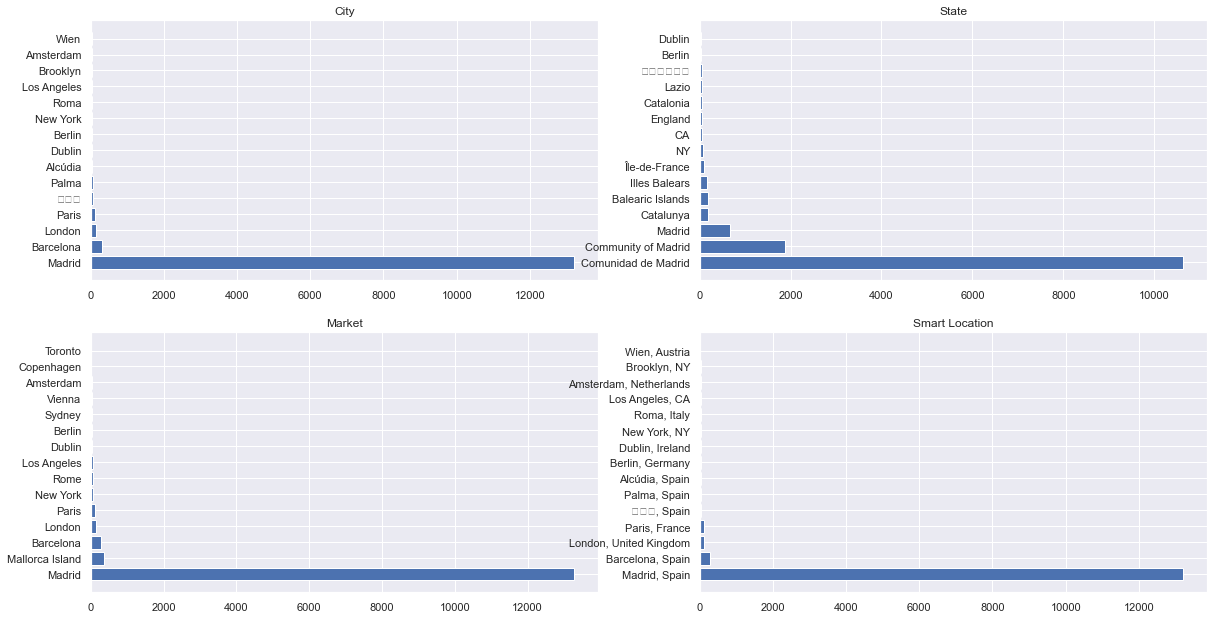

In [11]:
plt.figure(figsize=(20, 22))

plt.subplot(4, 2, 1)
plt.barh(data['City'].value_counts()[:15].index, data['City'].value_counts()[:15])
plt.gca().set_title('City')

plt.subplot(4, 2, 2)
plt.barh(data['State'].value_counts()[:15].index, data['State'].value_counts()[:15])
plt.gca().set_title('State')

plt.subplot(4, 2, 3)
plt.barh(data['Market'].value_counts()[:15].index, data['Market'].value_counts()[:15])
plt.gca().set_title('Market')

plt.subplot(4, 2, 4)
plt.barh(data['Smart Location'].value_counts()[:15].index, data['Smart Location'].value_counts()[:15])
plt.gca().set_title('Smart Location')

plt.show()

Presentan problemas de estructura. Podemos encontrar dos veces la misma ciudad en las variables pero escrita de forma distinta, como es el caso de Madrid o Palma. Además, observamos cómo están todas enormemente desbalanceadas por estar casi todos los alojamientos situados en Madrid. Estos dos problemas se evidencian de forma clara en la variable State, en la que las tres categorías con más observaciones son Comunidad de Madrid, Community of Madrid y Madrid. 

Dejaremos únicamente la variable City, ya que solo presenta 6 valores nulos y no observamos que ocurra el problema de la repetición de localizaciones registradas con nombres distintos. Aún así, por la gran cantidad de valores distintos que componen la variable city y el gran desbalanceo de Madrid, no creemos que vaya a incluirse en ningún modelo, tendrá una función descriptiva.

In [12]:
data=data.drop(['State','Market','Smart Location'],axis=1)

### Representación gráfica de las variables

Para terminar el análisis descriptivo de las variables, representaremos las continuas en forma de histograma y boxplot y las categóricas en gráficos de barras.

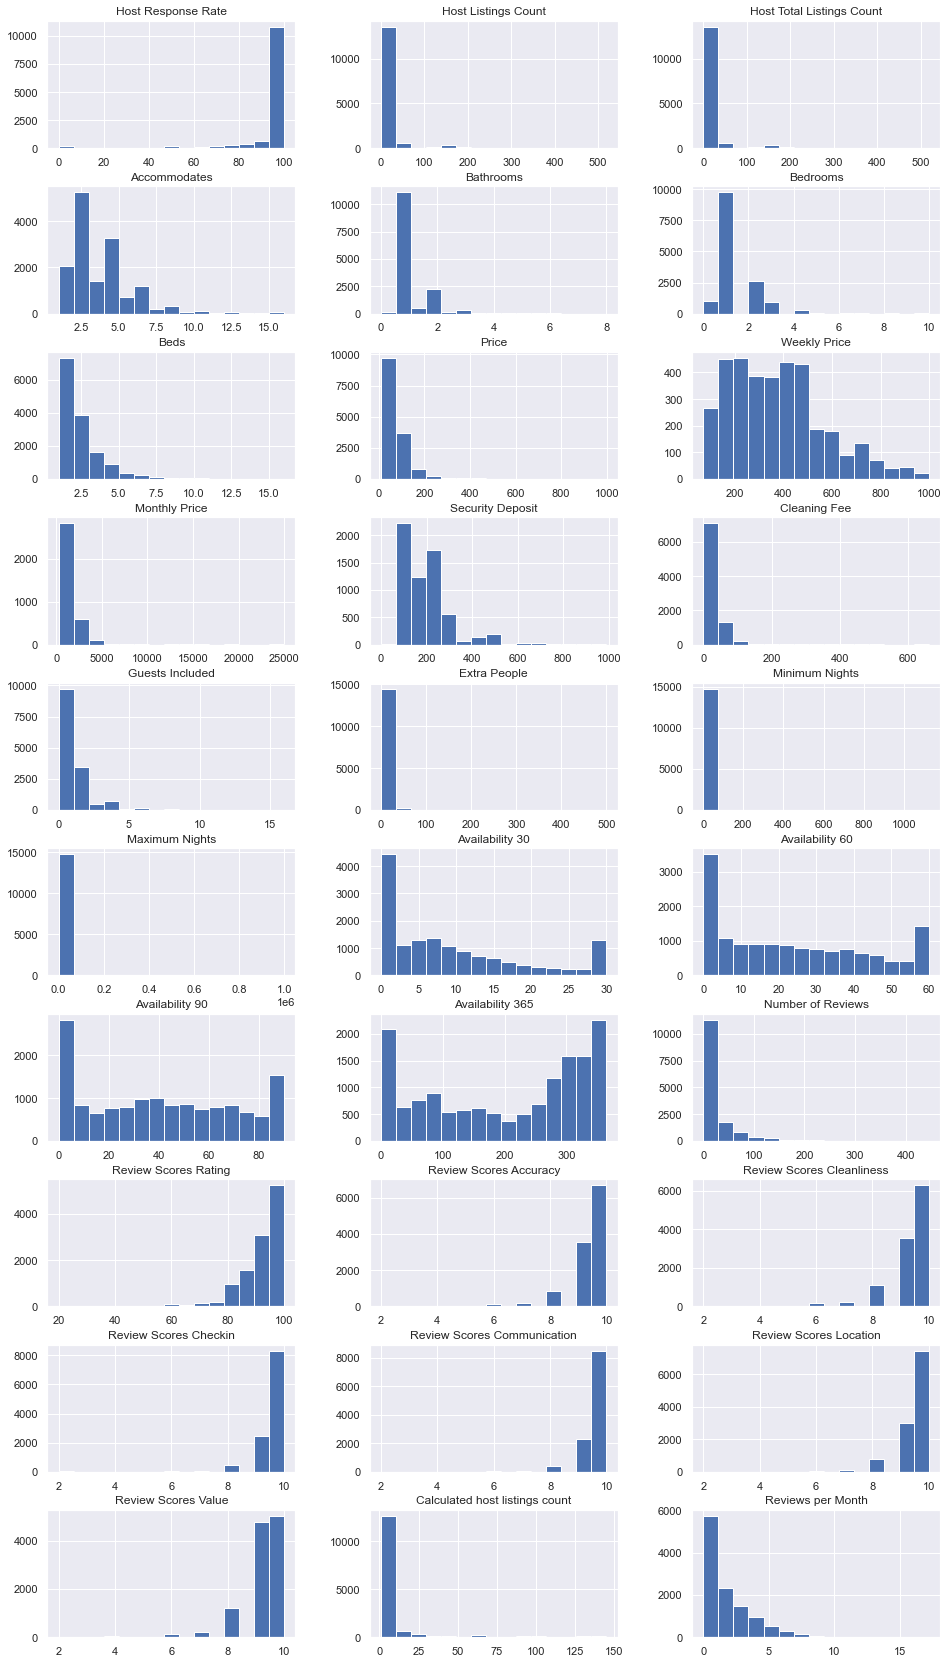

In [13]:
data.hist(figsize=(16,48),layout=(16,3),bins=15) 
plt.show()

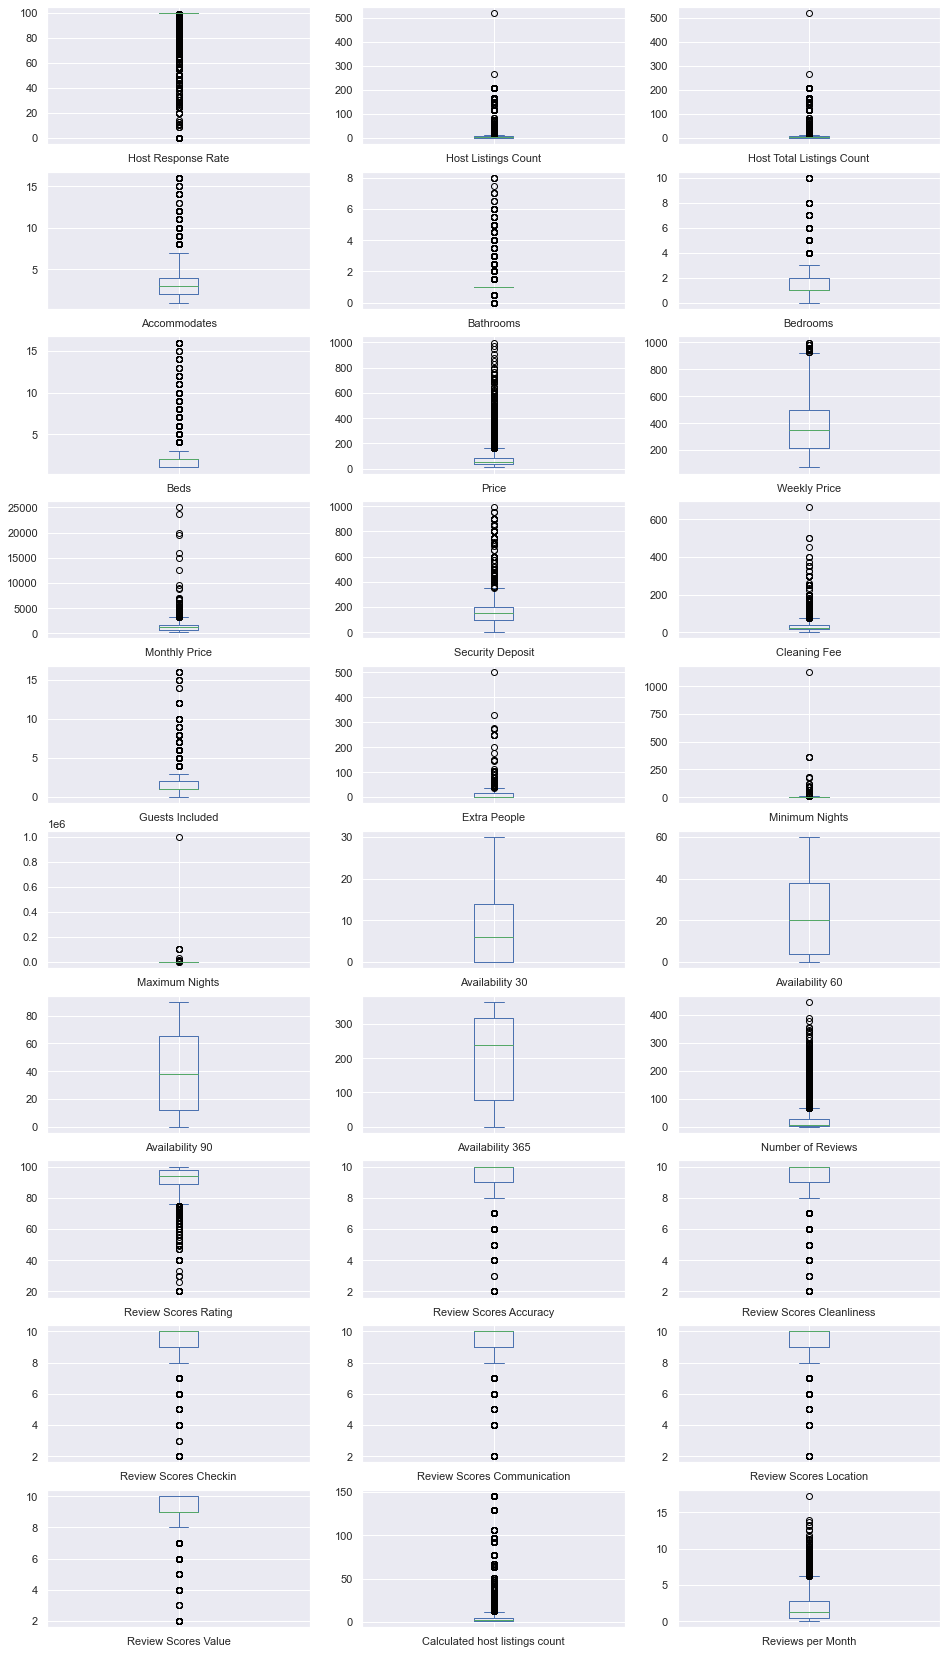

In [14]:
data.plot(figsize=(16,48),kind='box', subplots=True,layout=(16,3),sharex=False, sharey=False)
plt.show()

Vamos a analizar los outliers en más detalle.

Comenzaremos con Maximum Nights:

<AxesSubplot:xlabel='Maximum Nights'>

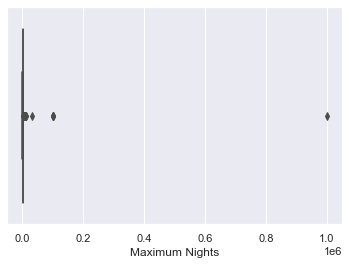

In [15]:
sns.boxplot(x=data['Maximum Nights'])

In [16]:
data['Maximum Nights'].max()

1000000

Vamos a retirar el outlier por poder ser un punto potencialmente muy influyente a la hora de construir los modelos.
Hay tres outliers claros en la variable Maximum Nights, uno con un valor de 1000000, otro de 100000 y otro de 30000. Los tres son potencialmente muy influyentes a la hora de construir modelos y son datos absurdos, ya que representan tiempos ilógicos para evaluar el tiempo de alojamiento de los clientes (70 años equivalen a 25550 días)

In [17]:
data = data[(data['Maximum Nights']<29999)]

<AxesSubplot:xlabel='Maximum Nights'>

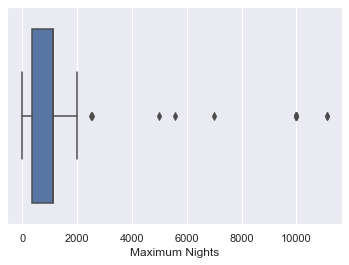

In [18]:
sns.boxplot(x=data['Maximum Nights'])

Sigue habiendo outliers en la variable, pero no tienen tanto peso como el que pudieran tener los dos que hemos retirado.

Continuamos analizando Minimum Nights:

<AxesSubplot:xlabel='Minimum Nights'>

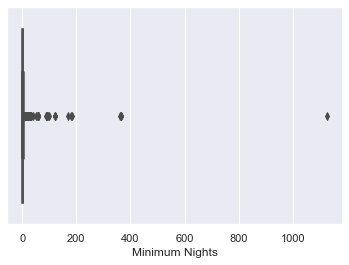

In [19]:
sns.boxplot(x=data['Minimum Nights'])

In [20]:
data['Minimum Nights'].max()

1125

En esta variable también hay varios outliers, con uno de ellos muy evidente. Lo retiramos primero y luego analizaremos los datos sin ese punto para considerar retirar algún punto más de la variable.

In [21]:
data = data[(data['Minimum Nights']<1124)]

<AxesSubplot:xlabel='Minimum Nights'>

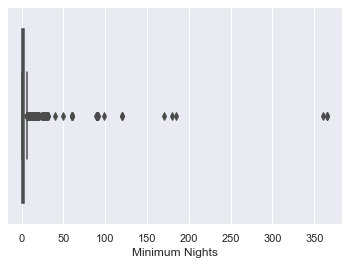

In [22]:
sns.boxplot(x=data['Minimum Nights'])

Sigue habiendo dos outliers que pueden tener mucho peso en la variable. Los retiraremos también.

In [23]:
data = data[(data['Minimum Nights']<300)]

<AxesSubplot:xlabel='Minimum Nights'>

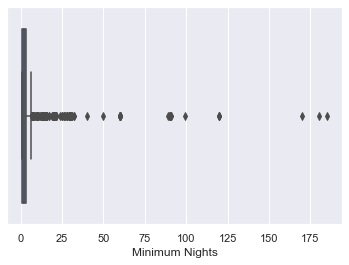

In [24]:
sns.boxplot(x=data['Minimum Nights'])

Sigue habiendo una gran cantidad de outliers en la variable. No retiraremos más, ya que esto se debe a que la gran mayoría de los alojamientos tienen un mínimo de 3 días a lo sumo de estancia (el tercer cuartil es de 3 días), lo que hace que al representar los datos en forma de boxplot, todas las observaciones que tengan valores en Minimum Nights 1.5 veces mayores al rango intercuartílico se consideren outliers.

Estudiando las variables Minimum Nights y Maximum Nights, nos parece que podría ser interesante hacer un análisis del precio unicamente a los alojamientos para estancias cortas. Más adelante se probará a construir modelos para este grupo de datos en específico.

Finalmente, representamos las variables categóricas en gráficos de barras y vemos cómo se distribuyen los datos en sus distintas categorías

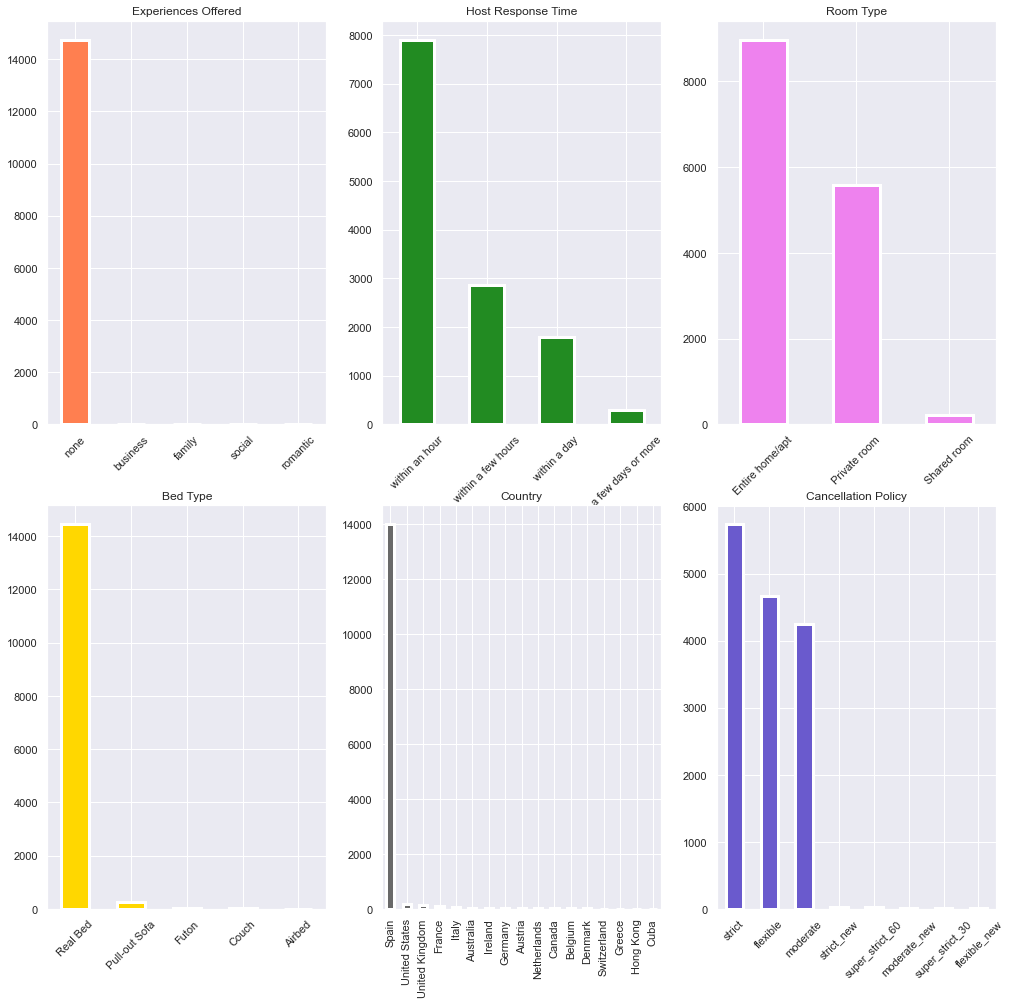

In [25]:
plt.figure(figsize=(17, 52))

plt.subplot(6, 3, 1)
data['Experiences Offered'].value_counts().plot(kind='bar',color = 'coral',linewidth = 3,title='Experiences Offered')
plt.xticks(rotation = 45) 

plt.subplot(6, 3, 2)
data['Host Response Time'].value_counts().plot(kind='bar',color = 'forestgreen',linewidth = 3,title='Host Response Time')
plt.xticks(rotation = 45) 

plt.subplot(6, 3, 3)
data['Room Type'].value_counts().plot(kind='bar',color = 'violet',linewidth = 3,title='Room Type')
plt.xticks(rotation = 45) 

plt.subplot(6, 3, 4)
data['Bed Type'].value_counts().plot(kind='bar',color = 'gold',linewidth = 3,title='Bed Type')
plt.xticks(rotation = 45) 

plt.subplot(6, 3, 5)
data['Country'].value_counts().plot(kind='bar',color = 'dimgray',linewidth = 3,title='Country')

plt.subplot(6, 3, 6)
data['Cancellation Policy'].value_counts().plot(kind='bar',color = 'slateblue',linewidth = 3,title='Cancellation Policy')
plt.xticks(rotation = 45) 

plt.show()

Analizaremos las variables categóricas.

Comenzamos con Experiences Offered:

In [26]:
data['Experiences Offered'].value_counts()

none        14751
business        8
family          3
social          3
romantic        3
Name: Experiences Offered, dtype: int64

La variable Experiences Offered solo tiene 17 valores distintos a none, no tiene ningún sentido trabajar con ella, por lo que la eliminaremos de nuestro conjunto de variables.

In [27]:
data=data.drop(['Experiences Offered'],axis=1)

Bed Type:

In [28]:
data['Bed Type'].value_counts()

Real Bed         14444
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed Type, dtype: int64

Transformaremos la variable Bed Type en una dicotómica compuesta por Real Bed y Rest. Habrá que tener cuidado luego al considerar incluirla o no en los modelos por el gran desbalanceo que presenta.

In [29]:
data['Bed Type'] = data['Bed Type'].replace(['Pull-out Sofa','Futon', 'Couch','Airbed'],'Rest')  

<AxesSubplot:title={'center':'Bed Type'}>

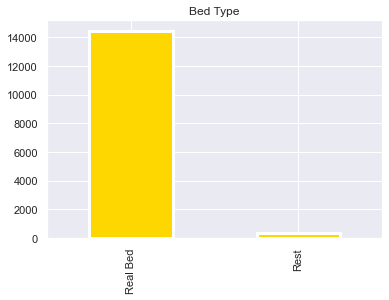

In [30]:
data['Bed Type'].value_counts().plot(kind='bar',color = 'gold',linewidth = 3,title='Bed Type')

Cancellation Policy:

In [31]:
data['Cancellation Policy'].value_counts()

strict             5734
flexible           4669
moderate           4246
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

Agruparemos las categorías en strict, flexible y moderate para reducir el número de niveles de la variable:

In [32]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace(['strict_new','super_strict_60','super_strict_30'],'strict')  
data['Cancellation Policy'] = data['Cancellation Policy'].replace(['moderate_new'],'moderate')  
data['Cancellation Policy'] = data['Cancellation Policy'].replace(['flexible_new'],'flexible')  

<AxesSubplot:title={'center':'Cancellation Policy'}>

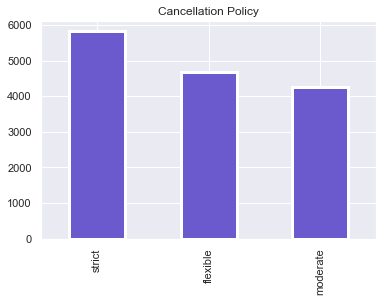

In [33]:
data['Cancellation Policy'].value_counts().plot(kind='bar',color = 'slateblue',linewidth = 3,title='Cancellation Policy')

Para terminar el apartado del análisis descriptivo, representaremos gráficamente la variable objetivo, con el fin de entender mejor su distribución.

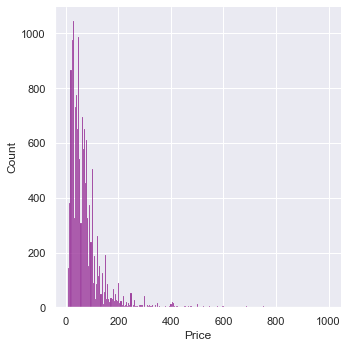

In [34]:
sns.displot(x=data['Price'],color = 'purple')

<AxesSubplot:xlabel='Price'>

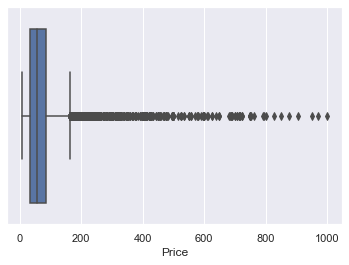

In [35]:
sns.boxplot(x=data['Price'])

In [36]:
data['Price'].describe()

count    14751.000000
mean        73.561792
std         72.065102
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Observamos cómo el precio de la estancia para una noche en la mayoría de los alojamientos ronda los 30-90 euros, y este va aumentando hasta encontrarnos con un alojamiento en el que hospedarse un día cuesta hasta 999 euros.

### Correlaciones

Tanto en los histogramas como en los boxplot, se puede observar cómo Host Listings Count y Host Total Listings Count se distribuyen de la misma forma. Vamos a calcular la correlación entre las variables y así aprovecharemos para estudiar la relación entre todas las variables, y en especial entre estas dos.

<AxesSubplot:>

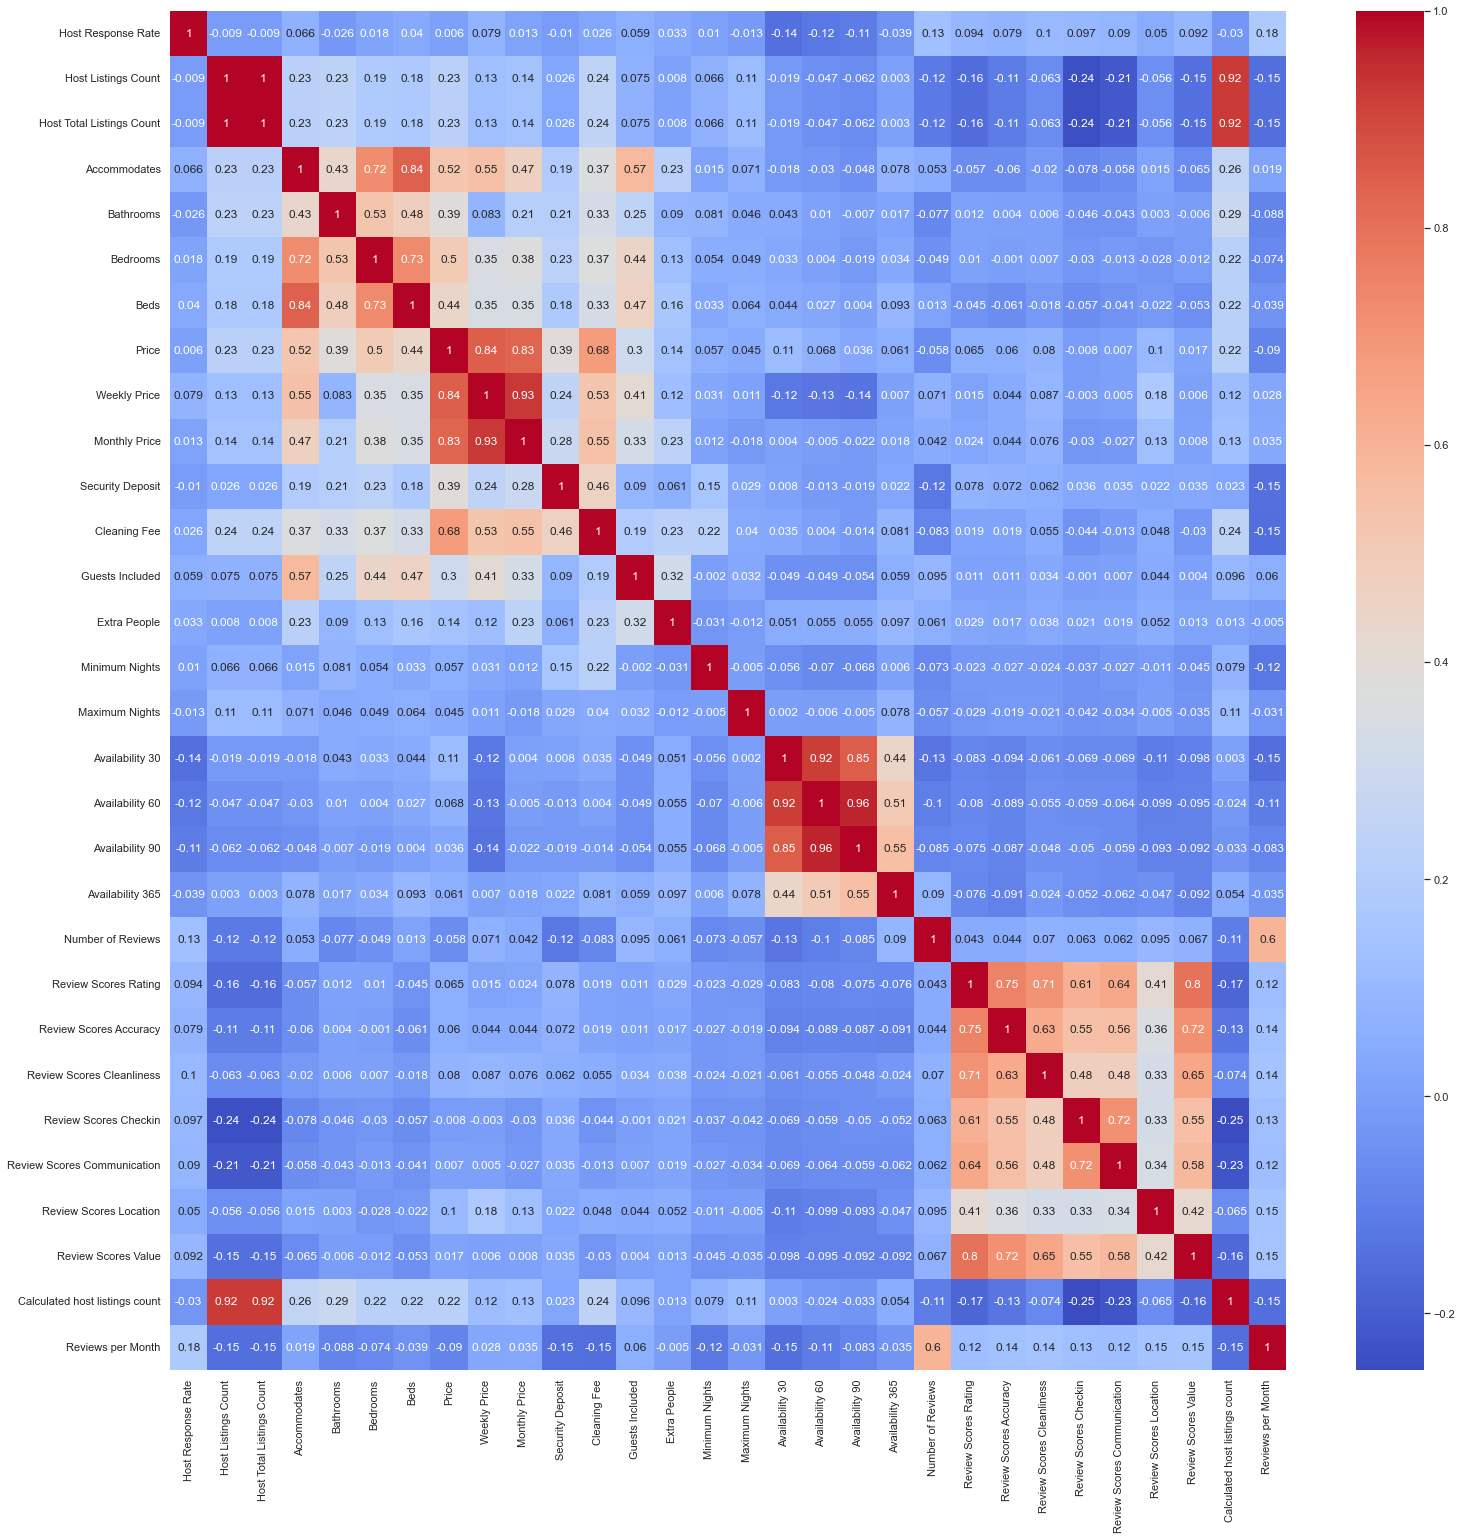

In [37]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr().round(3),annot=True,cmap='coolwarm')

Efectivamente, podemos observar cómo Host Listings Count y Host Total Listings Count son la misma variable. Además, se pueden observar altas correlaciones entre otros pares de variables, como es el caso de Weekly Price y Monthly Price o de Availability 30, Availability 60 y Availability 90. Tambíen se observa una alta correlación entre Calculated host listings count con Listings Count y Host Total Listings Count.

Eliminamos de nuestro conjunto de datos Host Total Listings Count, Host Listings Count, Availability 60, Weekly Price y Monthly Price y estudiaremos en mayor profundidad el resto de variables con un Scatter plot.

In [38]:
data=data.drop(['Host Total Listings Count','Host Listings Count','Availability 60','Weekly Price','Monthly Price'],axis=1)

Observamos que todas las variables referidas a la Review del alojamiento tienen una alta correlación entre ellas. Vamos a representar el pairplot de este conjunto de variables para comprobar el nivel de relación que presentan y decidir qué hacer con ellas.

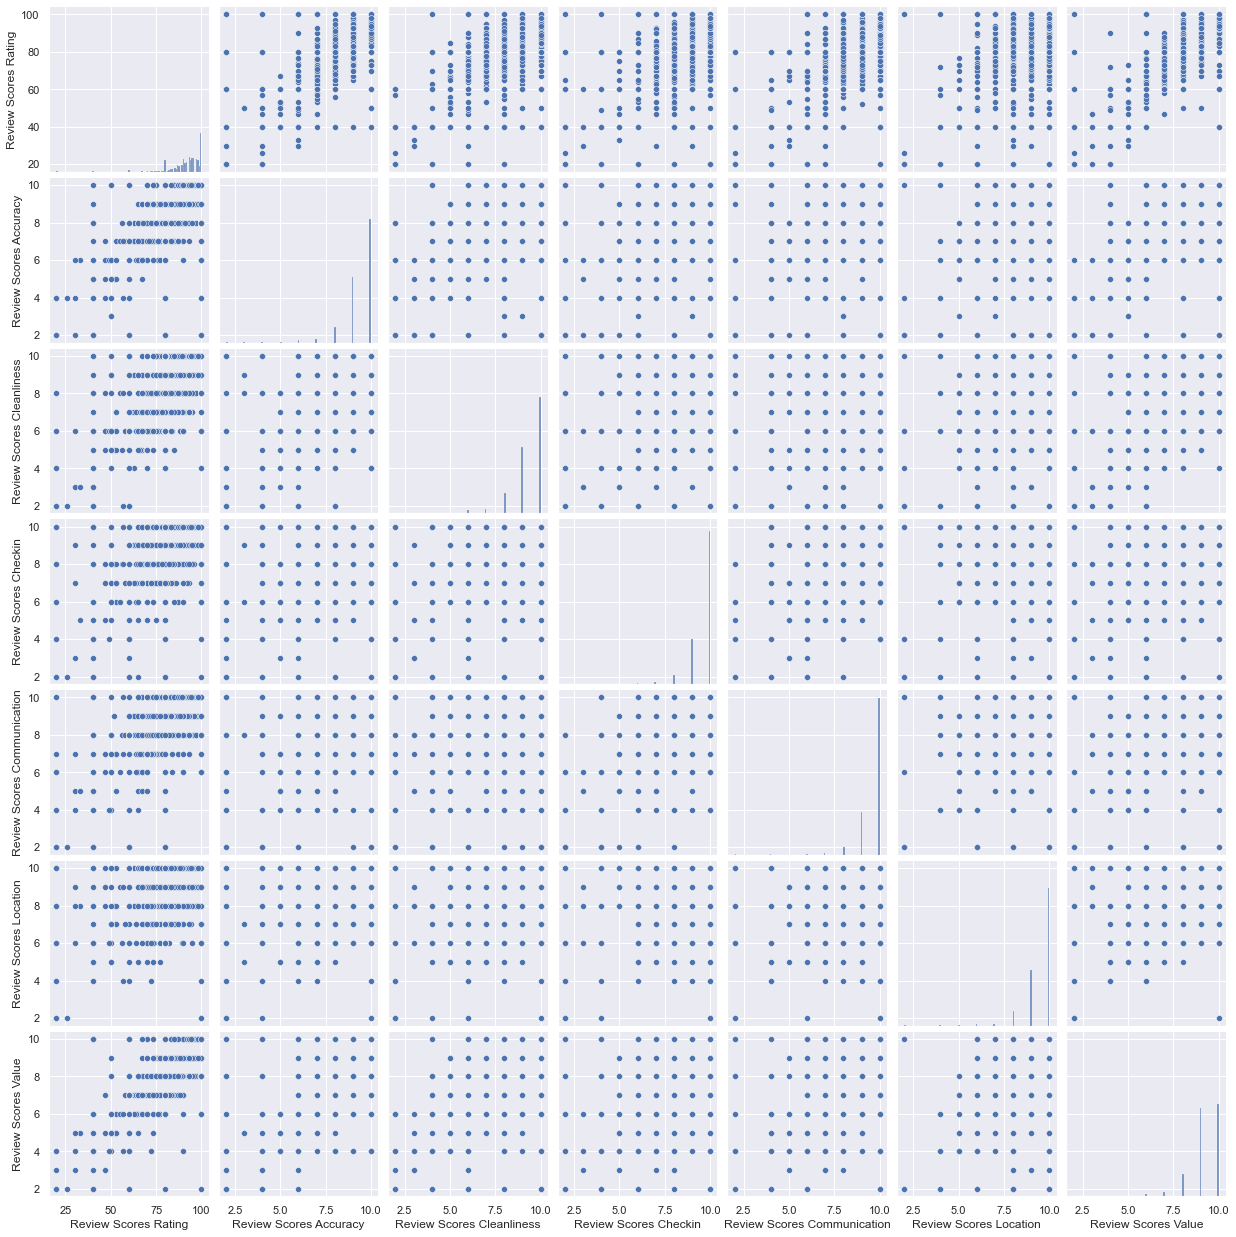

In [39]:
sns.pairplot(data.loc[:,['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value']])

Eliminaremos todas las variables referidas a la Review del alojamiento exceptuando Review Scores Rating, que engloba al resto.

In [40]:
data=data.drop(['Review Scores Accuracy','Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value'],axis=1)

Representamos el pairplot de las variables Number of Reviews y Reviews per Month, ya que tienen un coeficiente de correlación de 0.6

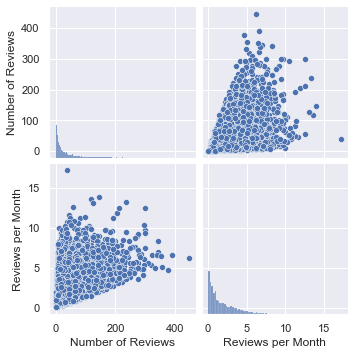

In [41]:
sns.pairplot(data.loc[:,['Number of Reviews','Reviews per Month']])

Observamos una alta homocedasticidad en el gráfico de dispersión de este par de variables, pero no consideramos necesario eliminar ninguna de las dos, pues pueden contener información a la hora de la construcción de los modelos. 

Ahora vamos a representar los gráficos de dispersión del grupo de variables que tienen correlaciones altas con el precio de los alojamientos.

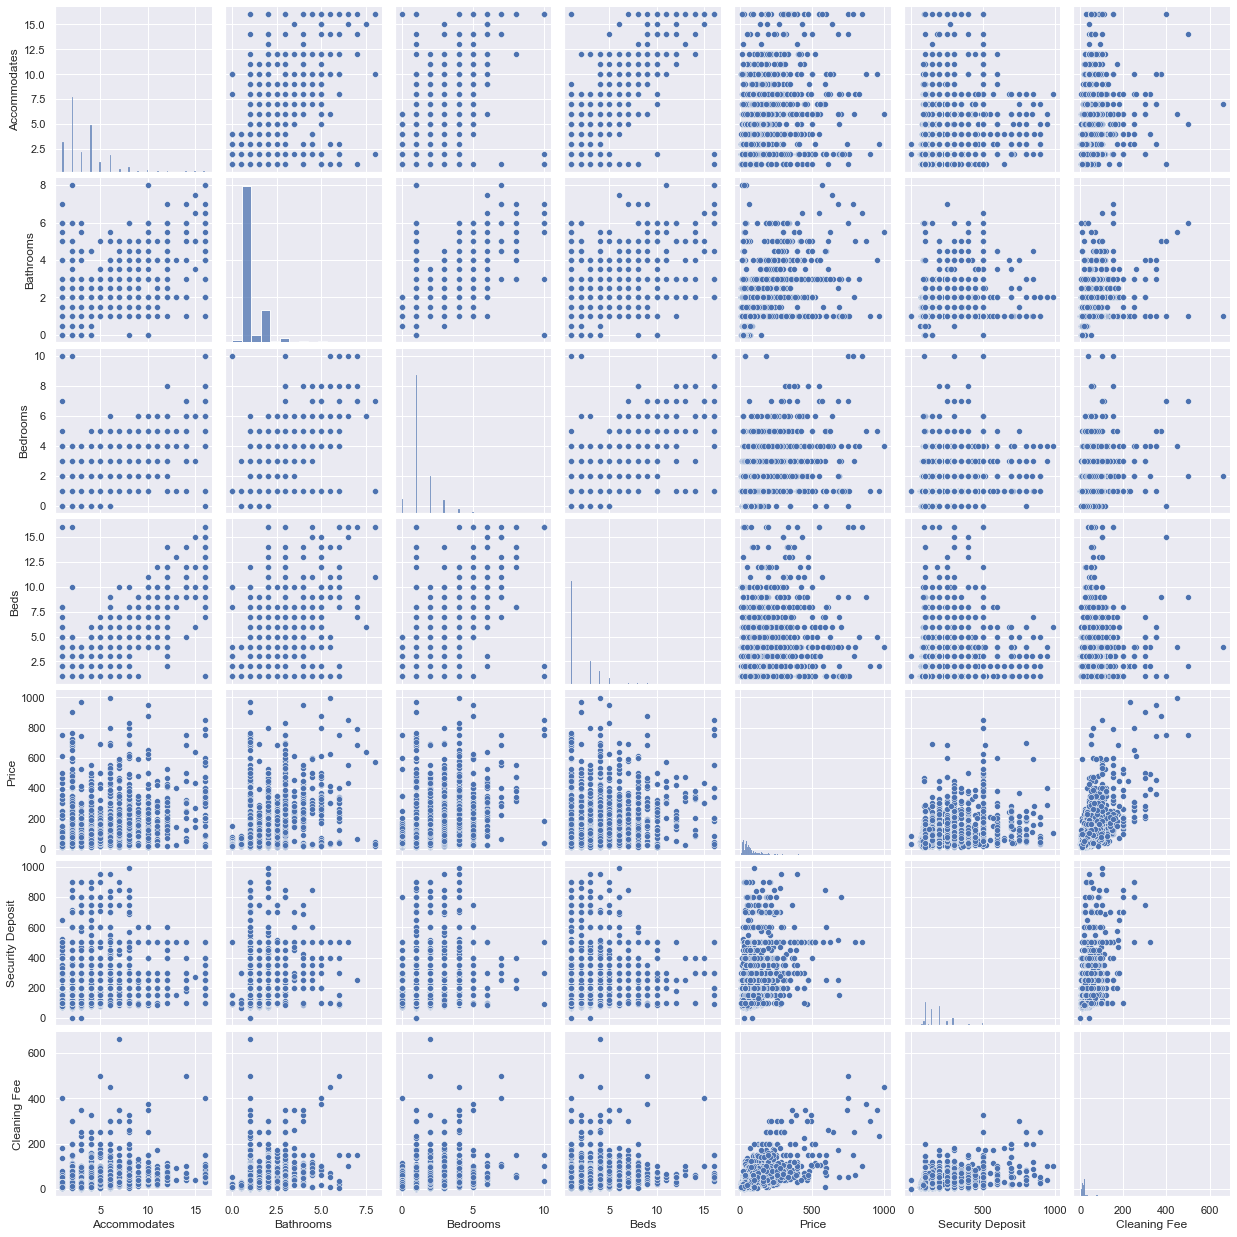

In [42]:
sns.pairplot(data.loc[:,['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee']])

No se observa ninguna relación muy evidente en los gráficos de dispersión de Price con el resto de variables. Como mucho, una relación creciente con la variable Cleaning Fee, pero el gráfico presenta una homocedasticidad muy alta.

## 2. Transformación de variables e Imputación de missings

En esta sección vamos a ir variable por variable arreglando sus problemas. Es decir, transformaremos las variables object en tipo float o int para que no nos den problemas después y las limpiaremos de missings en el caso de que los tenga.

Hagamos un .info() primero y veamos el estado de nuestras variables.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14768 entries, 0 to 14779
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14765 non-null  object 
 1   Host Response Time              12874 non-null  object 
 2   Host Response Rate              12874 non-null  float64
 3   Host Verifications              14762 non-null  object 
 4   City                            14762 non-null  object 
 5   Country                         14767 non-null  object 
 6   Property Type                   14768 non-null  object 
 7   Room Type                       14768 non-null  object 
 8   Accommodates                    14768 non-null  int64  
 9   Bathrooms                       14713 non-null  float64
 10  Bedrooms                        14743 non-null  float64
 11  Beds                            14719 non-null  float64
 12  Bed Type                        

Observemos que tenemos muchas variables tipo object. Esto nos va a dar problemas a la hora de imputar missings o al realizar algunos modelos. Debemos arreglar esto. Vayamos una por una.

#### Host since
Observemos cómo es la variable.

In [44]:
data['Host Since']

0        2016-02-11
1        2016-11-08
2        2016-11-08
3        2010-05-25
4        2016-01-12
            ...    
14775    2013-12-18
14776    2017-03-24
14777    2015-07-06
14778    2013-03-20
14779    2014-04-21
Name: Host Since, Length: 14768, dtype: object

Parece que es una variable tipo fecha, una buena idea para transformarla en float es restarsela al día actual de hoy que, gracias a python, podemos tener siempre actualizada. De esta manera obtendremos el número de días que lleva esa persona en el alojamiento. Los tres missings que tiene nos van a dar problemas, por lo que los vamos a eliminar pues sólo son 3.

In [45]:
data = data.dropna(subset=['Host Since'])

In [46]:
data['Host Since'].isna().sum()

0

In [47]:
from datetime import date
today = date.today()
for i in data['Host Since']:
    if isinstance(i, str):
        days = (today - date.fromisoformat(i)).days
        data['Host Since'] = data['Host Since'].replace(i,days) 

In [48]:
data['Host Since']

0        2282
1        2011
2        2011
3        4370
4        2312
         ... 
14775    3067
14776    1875
14777    2502
14778    3340
14779    2943
Name: Host Since, Length: 14765, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14765 entries, 0 to 14779
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14765 non-null  int64  
 1   Host Response Time              12874 non-null  object 
 2   Host Response Rate              12874 non-null  float64
 3   Host Verifications              14759 non-null  object 
 4   City                            14759 non-null  object 
 5   Country                         14764 non-null  object 
 6   Property Type                   14765 non-null  object 
 7   Room Type                       14765 non-null  object 
 8   Accommodates                    14765 non-null  int64  
 9   Bathrooms                       14710 non-null  float64
 10  Bedrooms                        14740 non-null  float64
 11  Beds                            14716 non-null  float64
 12  Bed Type                        

#### Host Response Time y Host Response Rate

Observemos primero que Host Response Time es de tipo object, transformemosla en tipo int

In [50]:
data['Host Response Time']

0            within an hour
1            within an hour
2            within an hour
3            within an hour
4            within an hour
                ...        
14775    within a few hours
14776                   NaN
14777        within an hour
14778    within a few hours
14779        within an hour
Name: Host Response Time, Length: 14765, dtype: object

<AxesSubplot:title={'center':'Host Response Time'}>

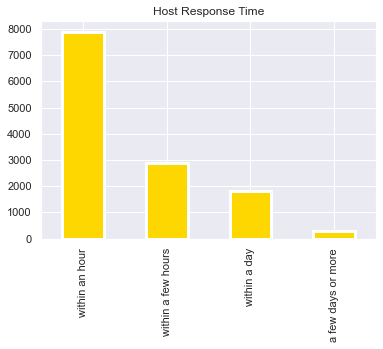

In [51]:
data['Host Response Time'].value_counts().plot(kind='bar',color = 'gold',linewidth = 3,title='Host Response Time')

Para que se asemeje a Host Response Rate, llamaremos a few days or more como 0 e iremos aumentando hasta 3.

In [52]:
data['Host Response Time'] = data['Host Response Time'].replace(['a few days or more'],0) 
data['Host Response Time'] = data['Host Response Time'].replace(['within a day'],1) 
data['Host Response Time'] = data['Host Response Time'].replace(['within a few hours'],2) 
data['Host Response Time'] = data['Host Response Time'].replace(['within an hour'],3) 

In [53]:
data['Host Response Time']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
14775    2.0
14776    NaN
14777    3.0
14778    2.0
14779    3.0
Name: Host Response Time, Length: 14765, dtype: float64

Antes de imputar los missings observemos dos cosas:
   1. Que si la observación tiene un Host response Rate de 0, entonces tiene un Host Response Time también de 0. Es decir, que la gente que no contesta nunca (Host Response Rate = 0) se mete en el grupo de a few days or more en Host response Time.
   2. Que ambas variables tienen los mismos valores missings y, de hecho, coinciden.

In [54]:
data[data['Host Response Rate']==0]

,Host Since,Host Response Time,Host Response Rate,Host Verifications,City,Country,Property Type,Room Type,Accommodates,Bathrooms,...,Maximum Nights,Calendar Updated,Availability 30,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month
69,4368,0.0,0.0,"email,phone,facebook,reviews,jumio",Madrid,Spain,Apartment,Private room,1,2.0,...,1125,2 months ago,0,6,281,0,NaN,flexible,2.0,NaN
82,3129,0.0,0.0,"email,phone,reviews,manual_offline,jumio",Madrid,Spain,Apartment,Entire home/apt,8,1.0,...,1125,today,0,0,82,1,40.0,strict,3.0,0.06
168,2762,0.0,0.0,"email,phone,reviews,manual_offline,jumio",Madrid,Spain,Apartment,Entire home/apt,4,2.0,...,1125,3 weeks ago,2,52,304,17,83.0,strict,1.0,0.57
183,2526,0.0,0.0,"email,phone,reviews,jumio",Madrid,Spain,Apartment,Private room,1,1.0,...,30,2 months ago,28,88,178,3,100.0,moderate,1.0,0.29
189,3619,0.0,0.0,"email,phone,reviews",Madrid,Spain,Apartment,Private room,1,1.5,...,1125,2 days ago,0,7,130,7,93.0,moderate,2.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,2235,0.0,0.0,"email,phone",Madrid,Spain,Bed & Breakfast,Private room,2,1.0,...,1125,2 months ago,30,90,365,0,NaN,flexible,1.0,NaN
14265,3460,0.0,0.0,"email,phone,facebook,reviews",Madrid,Spain,Apartment,Entire home/apt,4,1.0,...,1125,3 months ago,0,3,278,3,50.0,flexible,2.0,0.20
14588,2306,0.0,0.0,"phone,reviews",Madrid,Spain,Apartment,Private room,1,1.0,...,1125,4 months ago,30,90,365,8,93.0,flexible,1.0,0.56
14634,2625,0.0,0.0,"email,phone,reviews",Madrid,Spain,Apartment,Shared room,1,1.0,...,1125,25 months ago,30,90,365,0,NaN,flexible,1.0,NaN


In [55]:
data['Host Response Time'].isna().sum()==data['Host Response Rate'].isna().sum()

True

In [56]:
data[data['Host Response Rate'].isna()]

,Host Since,Host Response Time,Host Response Rate,Host Verifications,City,Country,Property Type,Room Type,Accommodates,Bathrooms,...,Maximum Nights,Calendar Updated,Availability 30,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month
11,3067,NaN,NaN,"email,phone,reviews,jumio,work_email",Antwerpen,Belgium,Apartment,Entire home/apt,2,1.0,...,1125,7 months ago,0,33,308,7,97.0,strict,1.0,0.43
22,2151,NaN,NaN,"email,phone,reviews",Barcelona,Spain,Apartment,Entire home/apt,4,2.0,...,1125,8 months ago,0,0,0,1,100.0,moderate,1.0,0.13
34,2968,NaN,NaN,"email,phone,jumio",Barcelona,Spain,Apartment,Entire home/apt,1,1.0,...,1125,2 months ago,30,90,90,1,NaN,flexible,1.0,0.04
36,2930,NaN,NaN,"email,phone,jumio",Amsterdam,Netherlands,Apartment,Private room,2,1.0,...,1125,13 months ago,0,0,0,0,NaN,flexible,1.0,NaN
38,3262,NaN,NaN,"email,phone,reviews,jumio",Paris,France,Apartment,Entire home/apt,6,1.0,...,1125,7 months ago,0,0,0,8,93.0,strict,1.0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14743,2128,NaN,NaN,phone,Madrid,Spain,Apartment,Private room,1,2.0,...,1125,7 months ago,0,7,282,0,NaN,flexible,1.0,NaN
14760,3115,NaN,NaN,"email,phone,reviews,jumio",Los Angeles,United States,Apartment,Entire home/apt,3,1.0,...,1125,6 months ago,0,0,0,3,93.0,moderate,1.0,0.11
14762,3152,NaN,NaN,"email,phone,reviews",Pollença,Spain,Apartment,Entire home/apt,6,1.0,...,1125,4 weeks ago,16,16,150,6,88.0,strict,2.0,0.30
14774,3988,NaN,NaN,"email,phone,facebook,reviews,kba",Queens,United States,Apartment,Private room,1,1.0,...,68,11 months ago,0,0,0,1,80.0,moderate,1.0,0.05


No vamos a eliminar las observaciones con missings del dataset pues todo apunta a que estos missings tienen significado. El significado que le damos es que el propietario del airbnb no ha contestado nunca aún. Podríamos crear una nueva variable en Host Response Time que refleje esto. Pero como hemos visto que la gente que no responde prácticamente nuca (Host Response Rate = 0) se introduce en el grupo de a few days or more en Host Response Time creemos más conveniente imputar los missings por 0 en Host Response Time y, por tanto, meterlos en el grupo de a few days or more (3) en Host Response Time.

In [57]:
data.fillna({'Host Response Time': 0}, inplace=True)
data.fillna({'Host Response Rate': 0}, inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14765 entries, 0 to 14779
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14765 non-null  int64  
 1   Host Response Time              14765 non-null  float64
 2   Host Response Rate              14765 non-null  float64
 3   Host Verifications              14759 non-null  object 
 4   City                            14759 non-null  object 
 5   Country                         14764 non-null  object 
 6   Property Type                   14765 non-null  object 
 7   Room Type                       14765 non-null  object 
 8   Accommodates                    14765 non-null  int64  
 9   Bathrooms                       14710 non-null  float64
 10  Bedrooms                        14740 non-null  float64
 11  Beds                            14716 non-null  float64
 12  Bed Type                        

Poco a poco esto ya va teniendo mejor pinta, sigamos.

#### Host Verifications

Observemos antes de hacer nada que los nulos de Host Verifications pueden tener significado. Que no tengan ninguna verificación. Fijémonos que todos los datos están formados por una cadena de caracteres que no está vacía. Es muy probable que si está vacía airbnb la haya categorizado como un valor faltante. Así estos 6 nulos en Host Verification es importante no eliminarlos aunque sean pocos.

In [59]:
list(data['Host Verifications'].head(10))

['email,phone,reviews,kba',
 'email,phone,reviews,work_email',
 'email,phone,reviews,work_email',
 'email,phone,facebook,reviews,manual_offline,jumio,work_email',
 'email,phone,reviews,jumio',
 'email,phone,reviews,jumio',
 'email,phone,reviews',
 'email,phone,facebook,reviews',
 'email,phone,reviews,jumio',
 'email,phone,reviews,kba']

Se nos ocurre hacer una cosa para transformar estas cadenas de caracteres en tipo int. Observamos que podemos recoger la misma información de esta variable si contáramos la cantidad de medios que ofrece el propietario para contactar con él. Podemos separar astutamente las observaciones con split y contarlas. De esta manera conseguimos nuestro objetivo.

In [60]:
# Un ejemplo
ejemplo = data['Host Verifications'][0].split(sep=',')
print ('El propietario es contactable mediante ', ejemplo, 'tiene ', len(ejemplo), 'formas disponibles de contactar con él')

El propietario es contactable mediante  ['email', 'phone', 'reviews', 'kba'] tiene  4 formas disponibles de contactar con él


Bien, funciona. Hagamos esto para todas las observaciones dándole el valor 0 a los missings que encontremos.

In [61]:
data.fillna({'Host Verifications': 0}, inplace=True)
for i in data['Host Verifications']:
    if isinstance(i, str):
        data['Host Verifications'] = data['Host Verifications'].replace(i,len(i.split(sep=','))) 

In [62]:
data['Host Verifications']

0        4
1        4
2        4
3        7
4        4
        ..
14775    4
14776    2
14777    4
14778    6
14779    7
Name: Host Verifications, Length: 14765, dtype: int64

#### City, Country, Property Type, Room Type y Bed Type

Para imputar el único missing de Country basta buscar cuál es y añadir en country su valor correcto.

In [63]:
data[data['Country'].isna()]

,Host Since,Host Response Time,Host Response Rate,Host Verifications,City,Country,Property Type,Room Type,Accommodates,Bathrooms,...,Maximum Nights,Calendar Updated,Availability 30,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month
151,3188,0.0,0.0,2,Salerno,NaN,House,Private room,1,1.0,...,1125,31 months ago,30,90,365,0,NaN,flexible,1.0,NaN


Sabemos que Salerno está en Italia, imputémoslo

In [64]:
data.loc[151,'Country']='Italy'

City es más complejo, pues todos los apartamentos con missings, están en España. Podríamos imputar por la moda de los que están en España pero podemos cometer errores porque nada nos dice que acertemos al hacer eso. Como sólo son 6 observaciones, creemos que lo más correcto es eliminarlas y dejarnos de problemas.

In [65]:
data = data.dropna(subset=['City'])

In [66]:
data.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
City                                 0
Country                              0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           55
Bedrooms                            25
Beds                                49
Bed Type                             0
Amenities                          165
Price                               17
Security Deposit                  8509
Cleaning Fee                      6082
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 30                      0
Availability 90                      0
Availability 365                     0
Number of Reviews        

Ya están limpias de datos faltantes, pero siguen siendo tipo object. Utilizaremos Label Encoder para transformarlas.

In [67]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

#Aplicamos LabelEncoder al dataset con loan_status como variable binaria:
for i in data.iloc[:,[4,5,6,7,12]]:
    data[i]=data[[i]].apply(LE.fit_transform)

In [68]:
data.head(10)

,Host Since,Host Response Time,Host Response Rate,Host Verifications,City,Country,Property Type,Room Type,Accommodates,Bathrooms,...,Maximum Nights,Calendar Updated,Availability 30,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month
0,2282,3.0,100.0,4,13,16,15,0,2,1.0,...,1125,today,10,64,281,42,98.0,moderate,1.0,3.50
1,2011,3.0,100.0,4,16,13,0,0,4,1.0,...,1125,today,6,39,309,1,80.0,strict,106.0,0.86
2,2011,3.0,100.0,4,16,13,0,0,4,1.0,...,1125,today,7,42,291,0,NaN,strict,106.0,NaN
3,4370,3.0,100.0,7,16,13,0,0,8,2.0,...,1125,today,11,47,316,13,92.0,strict,24.0,1.09
4,2312,3.0,99.0,4,16,13,0,0,5,1.0,...,1125,today,0,0,7,0,NaN,flexible,92.0,NaN
5,2312,3.0,99.0,4,16,13,0,0,6,1.0,...,1125,2 weeks ago,0,2,4,0,NaN,strict,92.0,NaN
6,3246,1.0,100.0,3,16,13,0,0,5,2.0,...,365,today,4,23,280,43,90.0,strict,1.0,1.22
7,3598,3.0,100.0,4,16,13,0,1,2,1.0,...,7,yesterday,13,66,66,29,96.0,flexible,1.0,0.64
8,2312,3.0,99.0,4,16,13,0,0,6,2.0,...,1125,a week ago,0,2,2,1,80.0,strict,92.0,0.33
9,2593,2.0,100.0,4,13,16,14,0,6,2.0,...,1125,today,21,81,356,1,100.0,strict,1.0,0.06


#### Bathrooms, Bedrooms y Beds

Estas variables ya son de tipo float, así que genial, pero contienen missings. Podríamos haber pensado que esos missings significa que el apartamento no tiene alguna de esas cosas pero podemos comprobar que existen muchos apartamentos a los que les ocurre eso.

In [69]:
(data.Bedrooms==0).sum()+(data.Bathrooms==0).sum()+(data.Beds==0).sum()

1067

Son pocos, por lo que podemos utilizar KNNimputer para darles un buen valor. Utilizaremos como vecinos el 0'001% de las observaciones totales, es decir, 15. Y  redondearemos los resultados a las unidades pues los valores reales son números enteros. Podríamos haber imputado todos por la mediana, pero es más interesante así.

In [70]:
knn = KNNImputer(n_neighbors=15)
data["Bathrooms"] = np.around(knn.fit_transform(data["Bathrooms"].values.reshape(-1, 1)),decimals=0)
data["Bedrooms"] = np.around(knn.fit_transform(data["Bedrooms"].values.reshape(-1, 1)),decimals=0)
data["Beds"] = np.around(knn.fit_transform(data["Beds"].values.reshape(-1, 1)),decimals=0)

In [71]:
data.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
City                                 0
Country                              0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                          165
Price                               17
Security Deposit                  8509
Cleaning Fee                      6082
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 30                      0
Availability 90                      0
Availability 365                     0
Number of Reviews        

#### Amenities

Con amenities volvemos a tener el mismo problema que se nois presentó al hacer Host Verifications. Los elementos son strings y cuantas más amenities (comodidades) haya, mucho mejor. Lo resolveremos de la misma forma. Además, hay 165 missings que reflejan que el apartamente presenta una lista vacía de comodidades, por lo que esos los imputaremos por 0.

In [72]:
data['Amenities']

0        TV,Cable TV,Internet,Wireless Internet,Air con...
1        Wireless Internet,Air conditioning,Elevator in...
2        Wireless Internet,Air conditioning,Elevator in...
3        TV,Internet,Wireless Internet,Air conditioning...
4        TV,Wireless Internet,Air conditioning,Kitchen,...
                               ...                        
14775    TV,Cable TV,Internet,Wireless Internet,Air con...
14776    TV,Wireless Internet,Kitchen,Breakfast,Elevato...
14777    TV,Cable TV,Internet,Wireless Internet,Air con...
14778    Internet,Wireless Internet,Kitchen,Heating,Was...
14779    TV,Cable TV,Internet,Wireless Internet,Air Con...
Name: Amenities, Length: 14759, dtype: object

In [73]:
data.fillna({'Amenities': 0}, inplace=True)
for i in data['Amenities']:
    if isinstance(i, str):
        data['Amenities'] = data['Amenities'].replace(i,len(i.split(sep=',')))

In [74]:
data['Amenities']

0        23
1         7
2         7
3        24
4        12
         ..
14775    11
14776    11
14777    17
14778    18
14779    21
Name: Amenities, Length: 14759, dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14759 entries, 0 to 14779
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14759 non-null  int64  
 1   Host Response Time              14759 non-null  float64
 2   Host Response Rate              14759 non-null  float64
 3   Host Verifications              14759 non-null  int64  
 4   City                            14759 non-null  int32  
 5   Country                         14759 non-null  int32  
 6   Property Type                   14759 non-null  int32  
 7   Room Type                       14759 non-null  int32  
 8   Accommodates                    14759 non-null  int64  
 9   Bathrooms                       14759 non-null  float64
 10  Bedrooms                        14759 non-null  float64
 11  Beds                            14759 non-null  float64
 12  Bed Type                        

#### Price

Price es nuestra variable objetivo. Por lo tanto no nos interesa imputar missings aquí, puede llevar a errores en el modelo. Sólo hay 17 además, vamos a eliminarlos.

In [76]:
data = data.dropna(subset=['Price'])

In [77]:
data.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
City                                 0
Country                              0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                            0
Price                                0
Security Deposit                  8494
Cleaning Fee                      6074
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 30                      0
Availability 90                      0
Availability 365                     0
Number of Reviews        

#### Security Deposit y Cleaning Fee

Viendo la elevada cantidad de missings que hay y la estructura de los datos es claro que los missings de estas variables tienen significado, que es, básicamente que el depósito de seguridad y la tarifa de limpieza son 0. Imputémoslo por eso entonces.

In [78]:
data.fillna({'Security Deposit': 0}, inplace=True)
data.fillna({'Cleaning Fee': 0}, inplace=True)

In [79]:
data.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
City                                 0
Country                              0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                            0
Price                                0
Security Deposit                     0
Cleaning Fee                         0
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 30                      0
Availability 90                      0
Availability 365                     0
Number of Reviews        

#### Calendar Updated

¿Podríamos eliminar esta variable por el trabajo que nos va a llevar transformarla a int? Sí, sin ninguna duda. Sería sorprendente que fuera mínimamemte importante en los modelos. Pero una vez mi padre me dijo que la diferencia entre un 10 y un 9 estaba en los detalles. Y nosottros vamos a por el 10.

Dicho esto, vamos a hacer un código que coge el string que refleja hace cuánto se actualizó el calendario y te devuelve el número de días desde que se actualizó.

In [80]:
data['Calendar Updated'].head(20)

0            today
1            today
2            today
3            today
4            today
5      2 weeks ago
6            today
7        yesterday
8       a week ago
9            today
10      a week ago
11    7 months ago
12           today
13     2 weeks ago
14     4 weeks ago
15           today
16      a week ago
17     5 weeks ago
18           today
19      a week ago
Name: Calendar Updated, dtype: object

In [81]:
for i in data['Calendar Updated']:
    if isinstance(i, str):
        if i.split()[0] == 'today':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,0)
        elif i.split()[0] == 'yesterday':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,1)
        elif i.split()[0] == 'never':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,2000) # EL máximo son 58 meses (1740 días aprox), si vemos uno con 2000 días, sabremos que es never
        elif i.split()[1] == 'days':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,int(i.split()[0]))
        elif i.split()[1] == 'week':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,7)
        elif i.split()[1] == 'weeks':
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,int(i.split()[0])*7)
        else:
            data['Calendar Updated'] = data['Calendar Updated'].replace(i,int(i.split()[0])*30)

Comprobamos que funciona

In [82]:
data['Calendar Updated'].head(20)

0       0
1       0
2       0
3       0
4       0
5      14
6       0
7       1
8       7
9       0
10      7
11    210
12      0
13     14
14     28
15      0
16      7
17     35
18      0
19      7
Name: Calendar Updated, dtype: int64

#### Review Scores Rating y Reviews Per Month

Estas variable ya están en tipo float así que eso que nos ahorramos, pero debemos imputar sus missings.

In [83]:
data[data['Review Scores Rating'].isna()].T

,2,4,5,12,20,28,34,36,39,44,...,14732,14738,14743,14747,14758,14768,14770,14771,14773,14776
Host Since,2011,2312,2312,2011,2653,2011,2968,2930,2315,3060,...,2045,1996,2128,2862,3160,3184,1937,2817,3339,1875
Host Response Time,3.0,3.0,3.0,3.0,2.0,3.0,0.0,0.0,2.0,3.0,...,1.0,3.0,0.0,1.0,3.0,3.0,2.0,0.0,1.0,0.0
Host Response Rate,100.0,99.0,99.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,...,100.0,90.0,0.0,50.0,100.0,100.0,100.0,33.0,96.0,0.0
Host Verifications,4,4,4,4,4,4,3,3,6,5,...,2,8,1,6,4,4,7,3,4,2
City,16,16,16,16,16,16,16,5,3,118,...,118,118,118,193,198,214,208,159,14,153
Country,13,13,13,13,13,13,13,12,13,13,...,13,13,13,13,13,13,13,13,13,6
Property Type,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14,21,14,14,14,1
Room Type,0,0,0,0,1,0,0,1,0,0,...,0,2,1,1,0,0,0,0,0,1
Accommodates,4,5,6,4,2,6,1,2,5,6,...,6,1,1,2,8,10,8,2,8,1
Bathrooms,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,4.0,4.0,1.0,2.0,3.0,1.0


Observamos que los missing en Review Scores Rating son ceros o unos en la variable Number of Reviews. Por lo que es lógico pensar que los valores nulos están porque no se puede calcular el rating con las reseñas que les han dejado (si es que les han dejado ninguna). No podemos imputarlos por 0 porque no es lo mismo haber tenido reviews que dan un 0 que no haber tenido ninguna. Por lo que se nos ocurre imputarlos por la media con simpleImputer. Aunque si podemos imputarlos con la media... tal vez sea mucho mejor imputar con KNNimputer, que no nos va a afectar tanto en la curtosidad de la distribución y va a dar mejores estimaciones. Lo volveremos a hacer con 15 vecinos y redondearemos a las unidades.

In [84]:
knn = KNNImputer(n_neighbors=15)
data["Review Scores Rating"] = np.around(knn.fit_transform(data["Review Scores Rating"].values.reshape(-1, 1)),decimals=0)

También es fácil observar que los missings de la variable Reviews per Month son ceros en la variable Number of Reviews. Es claro entonces que los nulos de esta variable se deben imputar con ceros.

In [85]:
data.fillna({'Reviews per Month': 0}, inplace=True)

In [86]:
data.isna().sum()

Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Verifications                0
City                              0
Country                           0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  0
Availability 30                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Cancellation Policy         

#### Cancellation Policy

Esta variable no presenta missings, pero es la última variable tipo object que tenemos. Previamente la habíamos unido en tres niveles: flexible, moderate y strict. Así que lo que vamos a hacer es transoformarla en int con flexible = 0, moderate = 1 y strict = 2.

In [87]:
data['Cancellation Policy']

0        moderate
1          strict
2          strict
3          strict
4        flexible
           ...   
14775      strict
14776    flexible
14777      strict
14778    moderate
14779    flexible
Name: Cancellation Policy, Length: 14742, dtype: object

In [88]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace('flexible',0) 
data['Cancellation Policy'] = data['Cancellation Policy'].replace('moderate',1) 
data['Cancellation Policy'] = data['Cancellation Policy'].replace('strict',2) 

In [89]:
data['Cancellation Policy']

0        1
1        2
2        2
3        2
4        0
        ..
14775    2
14776    0
14777    2
14778    1
14779    0
Name: Cancellation Policy, Length: 14742, dtype: int64

#### Calculated host listings count

Esta es la última variable que contiene missings y tiene únicamente 4. Ante más de 14000 datos los eliminaremos sin perder casi información. Además, probablemente serán datos que no se han guardado bien en la base de datos

In [90]:
data = data.dropna(subset=['Calculated host listings count'])

### Conclusión

Con todas las variables que hemos eliminado por no ofrecer información, repetir datos que podíamos obtener de otras variables o por dificultar absurdamente nuestro trabajo con el dataset nos hemos quedado finalmente con 30 variables. 

De éstas había algunas que eran tipo object y las hemos transformado en int o float para poder trabajar de forma más cómoda con ellas y que luego no nos den problemas. Algunas han sido sencillas y otras han llevado más trabajo, pero ahora todas están en un buen formato para su utilización.

Finalmente hemos limpiado la base de datos de datos faltantes. Los que tenían significado los hemos imputado por un valor lógico, los que no lo tenían o los hemos imputado por métodos como el KNN o hemos eliminado las observaciones correspondientes a ellos si no eran muchos. De forma que finalmente, nos hemos quedado con 14738 observaciones limpias.

Representemos con el info, con el describe y con un head la estructura final de nuestros datos.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738 entries, 0 to 14779
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14738 non-null  int64  
 1   Host Response Time              14738 non-null  float64
 2   Host Response Rate              14738 non-null  float64
 3   Host Verifications              14738 non-null  int64  
 4   City                            14738 non-null  int32  
 5   Country                         14738 non-null  int32  
 6   Property Type                   14738 non-null  int32  
 7   Room Type                       14738 non-null  int32  
 8   Accommodates                    14738 non-null  int64  
 9   Bathrooms                       14738 non-null  float64
 10  Bedrooms                        14738 non-null  float64
 11  Beds                            14738 non-null  float64
 12  Bed Type                        

In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,14738.0,2792.326299,591.463496,1861.0,2311.25,2704.50,3258.00,4743.00
Host Response Time,14738.0,2.117519,1.111558,0.0,1.00,3.00,3.00,3.00
Host Response Rate,14738.0,82.725607,34.689581,0.0,90.00,100.00,100.00,100.00
Host Verifications,14738.0,4.120030,1.285648,0.0,3.00,4.00,5.00,10.00
City,14738.0,116.673768,25.141488,0.0,118.00,118.00,118.00,245.00
Country,14738.0,12.869317,1.346077,0.0,13.00,13.00,13.00,16.00
Property Type,14738.0,2.226082,5.051843,0.0,0.00,0.00,0.00,21.00
Room Type,14738.0,0.406975,0.519352,0.0,0.00,0.00,1.00,2.00
Accommodates,14738.0,3.275139,2.092768,1.0,2.00,3.00,4.00,16.00
Bathrooms,14738.0,1.292102,0.665430,0.0,1.00,1.00,1.00,8.00


In [93]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Host Since,2282.0,2011.00,2011.0,4370.00,2312.0,2312.0,3246.00,3598.00,2312.00,2593.00,2512.00,3067.00,2011.0,2312.00,3369.00
Host Response Time,3.0,3.00,3.0,3.00,3.0,3.0,1.00,3.00,3.00,2.00,1.00,0.00,3.0,3.00,1.00
Host Response Rate,100.0,100.00,100.0,100.00,99.0,99.0,100.00,100.00,99.00,100.00,100.00,0.00,100.0,99.00,90.00
Host Verifications,4.0,4.00,4.0,7.00,4.0,4.0,3.00,4.00,4.00,4.00,2.00,5.00,4.0,4.00,4.00
City,13.0,16.00,16.0,16.00,16.0,16.0,16.00,16.00,16.00,13.00,5.00,7.00,16.0,16.00,16.00
Country,16.0,13.00,13.0,13.00,13.0,13.0,13.00,13.00,13.00,16.00,12.00,2.00,13.0,13.00,13.00
Property Type,15.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,14.00,0.00,0.00,0.0,0.00,0.00
Room Type,0.0,0.00,0.0,0.00,0.0,0.0,0.00,1.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
Accommodates,2.0,4.00,4.0,8.00,5.0,6.0,5.00,2.00,6.00,6.00,2.00,2.00,4.0,4.00,3.00
Bathrooms,1.0,1.00,1.0,2.00,1.0,1.0,2.00,1.00,2.00,2.00,1.00,1.00,1.0,1.00,2.00


## 3. Entrenamiento y test